# More Qwerties!

In [17]:
# import libraries
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sys

# import my own libraries
sys.path.append('../myUtils')
import myGraph as myG
import text as myT

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## Create Data

In [18]:
def createData(nPerClust, locations, labels=None, blur=1, plot=False):
    ''' 
    nPerClust: number of points per cluster
    locations: list of locations of clusters, eg.: [[1,1],[5,1],...]
    labels: list of labels per cluster, eg.: [0,1,...] (default: [0,1,...])
    blur: standard deviation of gaussian noise (default: 1)
    
    returns: data, labels, clusters
    data: tensor of size (2n x 2) (2n points, 2 dimensions)
    labels: tensor of size (2n x 1) (2n points, 1 dimension)
    clusters: list of clusters, each cluster is a list of 2 lists (x and y coordinates)
    
    plot using:
    for i,cluster in enumerate(clusters):
        plt.scatter(cluster[0], cluster[1], label=i)
    
    '''
    def noise():
        return np.random.randn(nPerClust)*blur

    # generate data
    if labels is None:
        labels = range(len(locations))  # [0,1,...]
    
    data = []
    for i,loc in enumerate(locations):
        data.append([loc[0]+noise(), loc[1]+noise()])
        
    # labels (0 for a, 1 for b) (2n x 1)
    labels_np = np.vstack([np.ones((nPerClust,1))*label for label in labels])
    
    # concatanate into a matrix
    data_np = np.hstack(data).T
     
    # convert to a pytorch tensor
    data = torch.tensor(data_np).float()
    
    # data for plotting
    clusters = []
    for i,loc in enumerate(locations):
        clusters.append([data[np.where(labels_np==i)[0],0], data[np.where(labels_np==i)[0],1]])
        
    if plot:
        # figsize 5,5
        plt.figure(figsize=(5,5))
        for i,cluster in enumerate(clusters):
            plt.scatter(cluster[0], cluster[1], label=i)
        plt.legend()
        plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
        # set same scale for x and y axes
        plt.gca().set_aspect('equal', adjustable='box')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Data')
        plt.show()
        plt.close()
    
    return data, labels_np, clusters

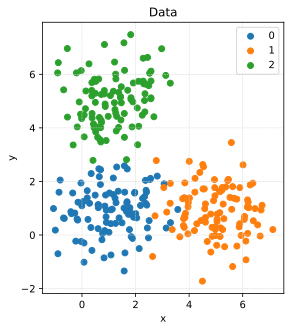

In [19]:
# define cluster locations:
locs = [[1,1],[5,1],[1,5]]
nPerClust = 100

# create data
data, labels_np, clusters = createData(nPerClust, locs, blur=1, plot=True)


In [20]:
# print a sample of data
print('data:') 
print(data[:5,:])

# print a sample of labels
print('labels:')
print(labels_np[:5,:])

data:
tensor([[ 0.0761, -0.2981],
        [ 1.6833,  1.2426],
        [ 0.0766, -1.0144],
        [-0.2324, -0.2277],
        [ 1.0074,  0.1024]])
labels:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [21]:
import seaborn as sns

# add the labels to data
data = pd.DataFrame(data)
data['label'] = labels_np

data

,0,1,label
0,0.076082,-0.298065,0.0
1,1.683334,1.242558,0.0
2,0.076627,-1.014449,0.0
3,-0.232422,-0.227669,0.0
4,1.007444,0.102354,0.0
...,...,...,...
295,2.570086,5.087347,2.0
296,2.684809,4.415211,2.0
297,-0.176877,4.035616,2.0
298,0.832678,5.393562,2.0


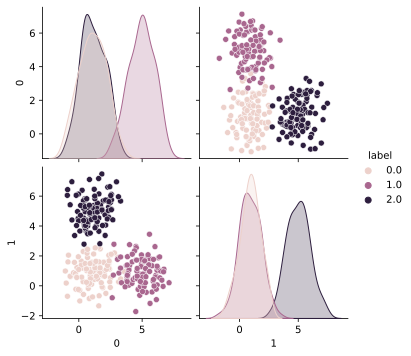

In [22]:
# some plots to show the data
sns.pairplot(data, hue='label')
plt.show()


In [23]:
# organize the data

# convert from pandas dataframe to tensor
tdata = torch.tensor( data[data.columns[0:2]].values ).float()

labels = torch.tensor( data.label.values ).long()

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

# Create the ANN model

In [24]:
import torch.nn as nn

# model architecture
ANNquerties = nn.Sequential(
    nn.Linear(2,8),   # input layer, 2 inputs
    nn.ReLU(),         # activation
    nn.Linear(8,8),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(8,3),   # output layer, 3 outputs
)

# loss function
lossfun = nn.CrossEntropyLoss() # loss function, normalizes by N by default

# optimizer
optimizer = torch.optim.SGD(ANNquerties.parameters(), lr=.01)

# Train the model

In [25]:
numepochs = 1000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []


# loop over epochs
for epochi in range(numepochs):

  # forward pass
  yHat = ANNquerties(tdata)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100 
  ongoingAcc.append( accuracyPct )              # add to list of accuracies
  
  
  if epochi % 100 == 0:
    print(f'epoch {epochi}...')



# final forward pass
predictions = ANNquerties(tdata)
  
predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

epoch 0...
epoch 100...
epoch 200...
epoch 300...
epoch 400...
epoch 500...
epoch 600...
epoch 700...
epoch 800...
epoch 900...


In [26]:
torch.argmax(yHat,axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

# Visualize the results

Final accuracy: 95.3333%


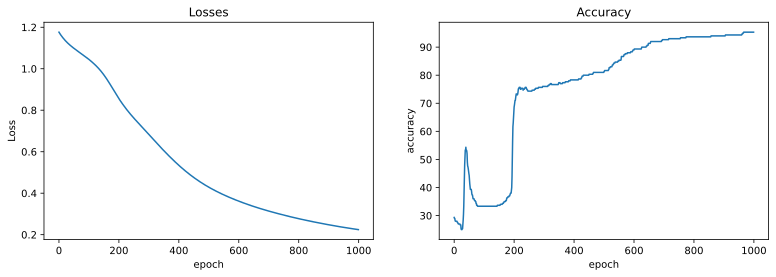

In [27]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

In [28]:
# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
torch.sum(sm(yHat),axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

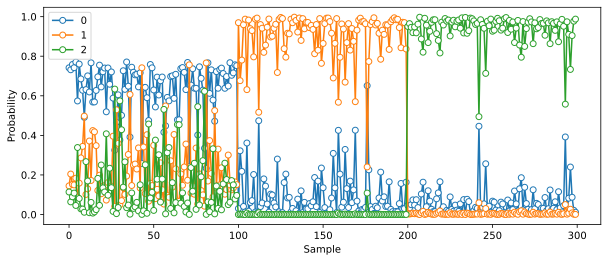

In [29]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(sm(yHat.detach()),'o-',markerfacecolor='w')
plt.xlabel('Sample')
plt.ylabel('Probability')
plt.legend(['0','1','2'])
plt.show()

# try it again without the softmax!

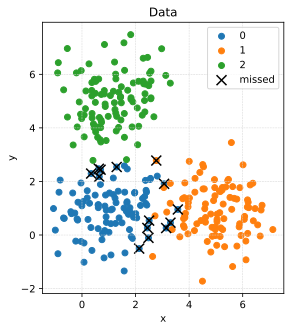

In [30]:
# plot the model outputs (label vs x, y) and missclasifications

predictions = ANNquerties(tdata)

plt.figure(figsize=(5,5))
for i,cluster in enumerate(clusters):
    plt.scatter(cluster[0], cluster[1], label=i)
    
failed = np.where(predlabels != labels)[0]
plt.scatter(tdata[failed,0], tdata[failed,1], marker='x', color='k', s=100, label='missed')

plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.show()



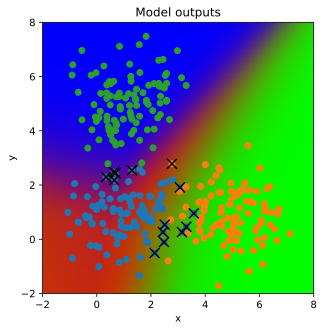

In [31]:
# create a heatmap of the model outputs
 
# create a grid of x and y values
x = np.linspace(-2,8,100)
y = np.linspace(-2,8,100)
xx,yy = np.meshgrid(x,y)
 
# convert to a tensor
grid = torch.tensor( np.vstack([xx.flatten(),yy.flatten()]).T ).float()
 
# get the model outputs
with torch.no_grad():
    predictions = ANNquerties(grid)
    
# convert to softmax
sm = nn.Softmax(1)
predictions = sm(predictions)
 
# reshape the predictions
predictions = predictions.reshape(100,100,3)
 
# plot the heatmap
plt.figure(figsize=(5,5))
plt.imshow(predictions, extent=[-2,8,-2,8], origin='lower')

# add the original data and the missclassifications
for i,cluster in enumerate(clusters):
    plt.scatter(cluster[0], cluster[1], label=i)
     
failed = np.where(predlabels != labels)[0]
plt.scatter(tdata[failed,0], tdata[failed,1], marker='x', color='k', s=100, label='missed')
 

plt.xlabel('x')
plt.ylabel('y')
plt.title('Model outputs')
plt.show()
